In [2]:
import numpy as np
import pandas as pd
import scipy.signal as sig
import scipy.stats as stat
import matplotlib.pyplot as plt
import allantools as at
import pandas as pd
%matplotlib widget


In [ ]:
valonDf = pd.read_pickle('valonCh2_2480MHz_0dBm_10sScanTime_10ksScantime_0dBm_1HzRBW_801pts_801MHzSpan.pkl')
dsgDf = pd.read_pickle('DSG830_24799MHz_0dBm_10sScanTime_10ksScantime_0dBm_1HzRBW_801pts_801MHzSpan.pkl')
valon12hrDf = pd.read_pickle('valonCh2_2480MHz_0dBm_10sScanTime_42ksScantime_0dBm_1HzRBW_801pts_801MHzSpan.pkl')
valon100ksDf = pd.read_pickle('valonCh2_2480MHz_0dBm_100sScanTime_100ksScantime_0dBm_1HzRBW_801pts_801MHzSpan_9.17.22.pkl')


In [ ]:
#Single scan
plt.figure()
valonDf.iloc[:, 100].plot(label = 'Valon')
dsgDf.iloc[:, 100].plot(label = 'DSG830')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.title('Single Scan')

In [ ]:
valonClockStd = np.zeros(1000)
dsgClockStd = np.zeros(1000)
for i in range(1000):
    valonClockStd[i] = valonDf.iloc[:,i].std()
    dsgClockStd[i] = dsgDf.iloc[:,i].std()
print('mean of Valon Clock STDs =', round(valonClockStd.mean(), 3), 'Hz')
print('mean of DSG Clock STDs =', round(dsgClockStd.mean(), 3), 'Hz')

In [ ]:
#vomit plot!
valonDf.plot(legend = False, alpha = .5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.title('All Curves (Valon)')

In [ ]:
#vomit plot! DSG830
dsgDf.plot(legend = False, alpha = .5)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.title('All Curves (DSG830)')

In [ ]:
#Log average
plt.figure()
valonDf.mean(axis=1).plot(label = 'Mean')
valonDf.iloc[:, 100].plot(label = 'Single scan')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.title('Log Mean (Valon)')

In [ ]:
#linear average

def dbm2watts(dBm):
    watts = 10**((dBm - 30)/10)
    return watts

valonLinDf = pd.read_pickle('valonCh2_2480MHz_0dBm_10sScanTime_10ksScantime_0dBm_1HzRBW_801pts_801MHzSpan.pkl')
valonLinDf = valonLinDf.apply(dbm2watts)

plt.figure()
valonLinDf.mean(axis=1).plot(label = 'Mean')
valonLinDf.iloc[:, 100].plot(label = 'Single scan')
plt.title('Linear Mean, Valon')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (Watts)')
plt.legend()


In [ ]:
#Log average compare
plt.figure()
valonDf.mean(axis=1).plot(label = 'Valon')
dsgDf.mean(axis=1).plot(label = 'DSG830')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.title('Log Mean')

In [ ]:
#linear average

def dbm2watts(dBm):
    watts = 10**((dBm - 30)/10)
    return watts

valonLinDf = pd.read_pickle('valonCh2_2480MHz_0dBm_10sScanTime_10ksScantime_0dBm_1HzRBW_801pts_801MHzSpan.pkl')
dsgLinDf = pd.read_pickle('DSG830_24799MHz_0dBm_10sScanTime_10ksScantime_0dBm_1HzRBW_801pts_801MHzSpan.pkl')
valonLinDf = valonLinDf.apply(dbm2watts)
dsgLinDf = dsgLinDf.apply(dbm2watts)

plt.figure()
valonLinDf.mean(axis=1).plot(label = 'Valon')
dsgLinDf.mean(axis=1).plot(label = 'DSG830')
plt.title('Linear Mean, Valon')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (Watts)')
plt.legend()

In [ ]:
#demo of peak finding

plt.figure()
for scanNum in [0,10,50,300,999]:
    peakIdx =  int(sig.find_peaks(valonDf.iloc[:, scanNum], distance=800)[0])
    peakFreq = valonDf.index[peakIdx]
    valonDf.iloc[:, scanNum].plot(label = 'Single scan')
    plt.plot(peakFreq, valonDf.iloc[peakIdx, scanNum], 'ro')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')


In [ ]:
from cProfile import label


nScansValon = len(valonDf.iloc[0,:])
peakIdxArrValon = np.zeros(nScansValon)
peakFreqArrValon = np.zeros(nScansValon)

nScansDsg = len(dsgDf.iloc[0,:])
peakIdxArrDsg = np.zeros(nScansDsg)
peakFreqArrDsg = np.zeros(nScansDsg)



for scan in range(nScansValon):
    #Find peak of each scan to create time series of peak wandering
    #find_peaks returns tuple; (single element arr of indicies, empty dict). Take int of single element arr
    # Distance = 800 only gets largest peak.
    peakIdxArrValon[scan] =  int(sig.find_peaks(valonDf.iloc[:, scan], distance=800)[0])
    peakIdxArrDsg[scan] =  int(sig.find_peaks(dsgDf.iloc[:, scan], distance=800)[0])

for scan in range(nScansDsg):
    #Find peak of each scan to create time series of peak wandering
    #find_peaks returns tuple; (single element arr of indicies, empty dict). Take int of single element arr
    # Distance = 800 only gets largest peak.
    peakIdxArrDsg[scan] =  int(sig.find_peaks(dsgDf.iloc[:, scan], distance=800)[0])




for i, idx in enumerate(peakIdxArrValon):
    #convert from idx that scipy find_peaks returns to actual frequency
    peakFreqArrValon[i] = valonDf.index[idx]

for i, idx in enumerate(peakIdxArrDsg):
    #convert from idx that scipy find_peaks returns to actual frequency
    peakFreqArrDsg[i] = dsgDf.index[idx]



plt.figure()
plt.plot(peakFreqArrValon, label = 'Valon')
plt.plot(peakFreqArrDsg, label = 'DSG830')

plt.xlabel('Scan number')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.title('Peak frequency vs scan number')


In [ ]:

nScansValon12 = len(valon12hrDf.iloc[0,:])
peakIdxArrValon12 = np.zeros(nScansValon12)
peakFreqArrValon12 = np.zeros(nScansValon12)

for scan in range(nScansValon12):
    #Find peak of each scan to create time series of peak wandering
    #find_peaks returns tuple; (single element arr of indicies, empty dict). Take int of single element arr
    # Distance = 800 only gets largest peak.
    peakIdxArrValon12[scan] =  int(sig.find_peaks(valon12hrDf.iloc[:, scan], distance=800)[0])
    
for i, idx in enumerate(peakIdxArrValon12):
    #convert from idx that scipy find_peaks returns to actual frequency
    peakFreqArrValon12[i] = valon12hrDf.index[idx]

    
plt.figure()
plt.plot(list(valon12hrDf), peakFreqArrValon12, label = 'Valon 12 hour')
plt.xlabel('Scan datetime')
#plt.xlabel(list(valon12hrDf))
plt.ylabel('Frequency (Hz)')
#plt.legend()
plt.title('Peak frequency vs datetime')


samplesToCut = 1200


plt.figure()
plt.plot(peakFreqArrValon12[0::10], label = 'Valon 12 hour')
plt.xlabel('Scan number (10 seconds between scans)')
plt.ylabel('Frequency (Hz)')
plt.title('Peak frequency vs scan number')
#plt.xlim(samplesToCut, len(peakFreqArrValon12))
#plt.ylim(2479999145, 2479999190)

plt.figure()
plt.hist(peakFreqArrValon12[samplesToCut:], bins = 30)

In [ ]:

nScansValon100ks = len(valon100ksDf.iloc[0,:])
peakIdxArrValon100ks = np.zeros(nScansValon100ks)
peakFreqArrValon100ks = np.zeros(nScansValon100ks)

for scan in range(nScansValon100ks):
    #Find peak of each scan to create time series of peak wandering
    #find_peaks returns tuple; (single element arr of indicies, empty dict). Take int of single element arr
    # Distance = 800 only gets largest peak.
    peakIdxArrValon100ks[scan] =  int(sig.find_peaks(valon100ksDf.iloc[:, scan], distance=800)[0])
    
for i, idx in enumerate(peakIdxArrValon100ks):
    #convert from idx that scipy find_peaks returns to actual frequency
    peakFreqArrValon100ks[i] = valon100ksDf.index[idx]

    


samplesToCut = 0


plt.figure()
plt.plot(list(valon100ksDf)[samplesToCut:], peakFreqArrValon100ks[samplesToCut:], label = 'Valon 30 hour')
plt.xlabel('Scan datetime')
#plt.xlabel(list(valon12hrDf))
plt.ylabel('Frequency (Hz)')
#plt.legend()
plt.title('Peak frequency vs datetime')

plt.figure()
plt.plot(list(valon100ksDf)[samplesToCut:], (peakFreqArrValon100ks[samplesToCut:]/peakFreqArrValon100ks.mean())-1, label = 'Valon 30 hour')
plt.xlabel('Scan datetime')
#plt.xlabel(list(valon12hrDf))
plt.ylabel('(Frequency/Mean Frequency) - 1')
#plt.legend()
plt.title('Normilized Peak Frequency vs Datetime')


plt.figure()
plt.plot(peakFreqArrValon100ks[samplesToCut:], label = 'Valon 30 hour')
plt.xlabel('Scan number (10 seconds between scans)')
plt.ylabel('Frequency (Hz)')
plt.title('Peak frequency vs scan number')
#plt.xlim(samplesToCut, len(peakFreqArrValon12))
#plt.ylim(2479999145, 2479999190)

plt.figure()
plt.hist(peakFreqArrValon100ks[samplesToCut:], bins = 30)

plt.figure()
plt.hist((peakFreqArrValon100ks[samplesToCut:]/peakFreqArrValon100ks.mean())-1, bins = 30)
plt.xlabel('(Frequency/Mean Frequency) - 1')
plt.ylabel('Counts')



In [ ]:
plt.figure()
plt.hist(peakFreqArrValon, bins =20, label='Valon', alpha = 1);
plt.hist(peakFreqArrDsg, bins =20, label='DSG830', alpha = .5);
plt.xlabel('Frequency (Hz)')
plt.ylabel('Counts')
plt.title('Peak Frequency Histogram')
plt.legend()

In [ ]:
valonMeanBoot = stat.bootstrap((peakFreqArrValon,), np.mean, confidence_level=.9)
dsgMeanBoot = stat.bootstrap((peakFreqArrDsg,), np.mean, confidence_level=.9)
valonStdBoot = stat.bootstrap((peakFreqArrValon,), np.std, confidence_level=.9)
dsgStdBoot = stat.bootstrap((peakFreqArrDsg,), np.std, confidence_level=.9)

In [ ]:
print('Valon 3 hour stability run:', round(peakFreqArrValon.mean(),1), '+-', round(peakFreqArrValon.std(), 2),'Hz')
print('Valon STD 90% confidence interval = ', valonStdBoot.confidence_interval.high, ',', valonStdBoot.confidence_interval.low)
print()
print('DSG830 3 hour stability run:', round(peakFreqArrDsg.mean(),1), '+-', round(peakFreqArrDsg.std(), 2),'Hz')
print('DSG STD 90% confidence interval = ', dsgStdBoot.confidence_interval.high, ',', dsgStdBoot.confidence_interval.low)

Text(0.5, 1.0, 'Valon Frequency Drift vs Time')

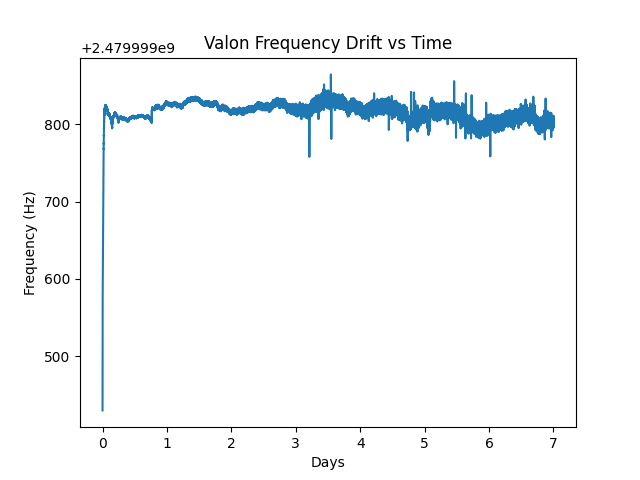

In [34]:
#import data from 1 week run using Brian's setup
valonData = (pd.read_csv('Valon_1S_20220922_122207.csv'))
valonDataArr = (valonData.to_numpy())
valonDataArr = np.asarray([i[0] for i in valonDataArr])
dayIdx = [h/3600/24 for h in range(len(valonDataArr))]
plt.figure()
plt.plot(dayIdx, valonDataArr)
plt.xlabel('Days Since Start')
plt.ylabel('Frequency (Hz)')
plt.title('Valon Frequency Drift vs Time')

mean =  2479999816.057006 Hz
std =  9.92825386639712 Hz
std =  4.003328468863446 ppb
1.9444444444444444


Text(0.5, 1.0, 'Valon Frequency Drift vs Time (Cut Warm Up)')

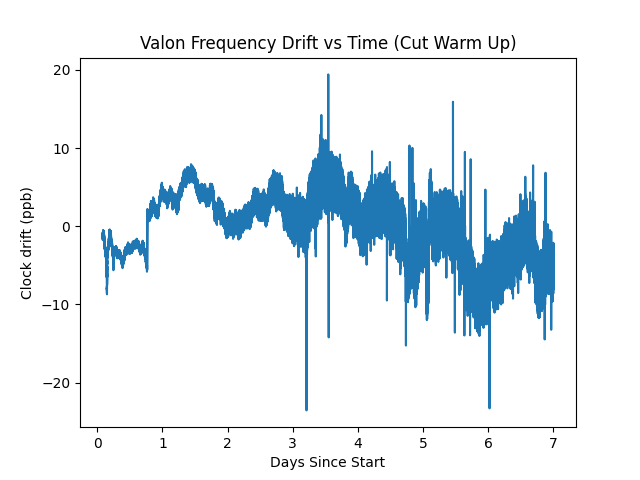

In [59]:
#trim 
startSample = 7000
valonDataTrimArr = valonDataArr[startSample:]
valonMean = valonDataTrimArr.mean()


print('mean = ', valonDataTrimArr.mean(), 'Hz')
print('std = ', valonDataTrimArr.std(), 'Hz')
print('std = ', valonDataTrimArr.std()/valonMean *1e9, 'ppb')


dayIdx = [h/3600/24 for h in range(startSample, len(valonDataTrimArr) + startSample)]
print(hourIdx[0])

plt.close('all')
plt.figure()
plt.plot(dayIdx, ((valonDataTrimArr/valonMean) - 1) * 1e9)
plt.ylabel('Clock drift (ppb)')
plt.xlabel('Days Since Start')
plt.title('Valon Frequency Drift vs Time (Cut Warm Up)')

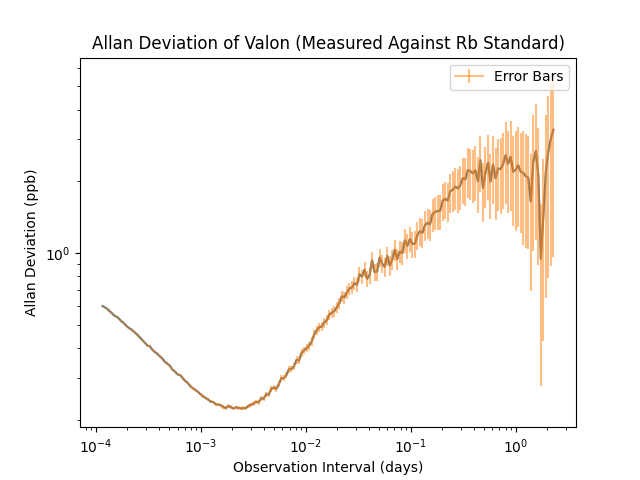

In [57]:
valonDataTrimNormArr = valonDataTrimArr/valonMean

t = np.logspace(1, np.log10(len(valonDataTrimArr)), 200) # tau values from 1 to 1000
r = 1

'''
(taus2, ad, ade, ns): tuple
      Tuple of values
taus2: np.array
    Tau values for which td computed
ad: np.array
    Computed adev for each tau value
ade: np.array
    adev errors
ns: np.array
    Values of N used in each adev calculation
'''
(t2, ad, ade, adn) = at.adev(valonDataTrimNormArr, rate=r, data_type="freq", taus=t)  # Compute the ADEV

plt.close('all')
plt.figure()
plt.loglog(t2/86400, ad*1e9)
plt.errorbar((t2/86400), (ad*1e9), yerr = (ade*1e9), alpha = .5, label = 'Error Bars')
plt.title('Allan Deviation of Valon (Measured Against Rb Standard)')
plt.xlabel('Observation Interval (days)')
plt.ylabel('Allan Deviation (ppb)')
plt.legend()

4.003328468814134
597799


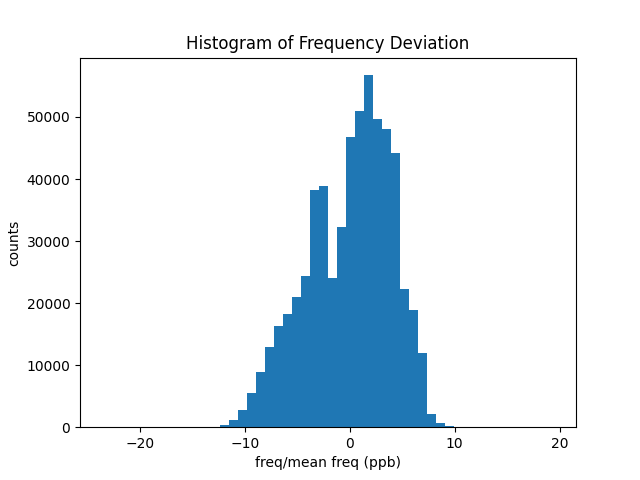

In [30]:
plt.close('all')
plt.figure()
plt.hist((valonDataTrimNormArr - 1) * 1e9, bins = 50)
plt.title('Histogram of Normilized Frequency Deviation')
plt.xlabel('freq/mean freq (ppb)')
plt.ylabel('counts')

print(((valonDataTrimNormArr - 1) * 1e9).std())
print(len(valonDataTrimNormArr))

In [19]:
#np.save('hist_valonRb_1week.npy', np.histogram((valonDataTrimNormArr) , bins = 50))
np.load('hist_valonRb_1week.npy', allow_pickle=True)

array([array([    2,     0,     1,     0,     1,     2,     0,     1,     0,
                  1,     3,    18,    71,   316,  1130,  2775,  5541,  8836,
              12891, 16285, 18278, 21036, 24312, 38294, 38878, 24115, 32291,
              46734, 51031, 56734, 49705, 48135, 44261, 22290, 18863, 11953,
               2148,   680,   136,    33,     7,     3,     2,     2,     0,
                  1,     1,     0,     0,     2])                           ,
       array([0.99999998, 0.99999998, 0.99999998, 0.99999998, 0.99999998,
              0.99999998, 0.99999998, 0.99999998, 0.99999998, 0.99999998,
              0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
              0.99999999, 0.99999999, 0.99999999, 0.99999999, 0.99999999,
              0.99999999, 0.99999999, 1.        , 1.        , 1.        ,
              1.        , 1.        , 1.        , 1.        , 1.        ,
              1.        , 1.        , 1.        , 1.        , 1.00000001,
              1.000

Text(0.5, 1.0, 'Valon Frequency Drift vs Time, scaled by 5')

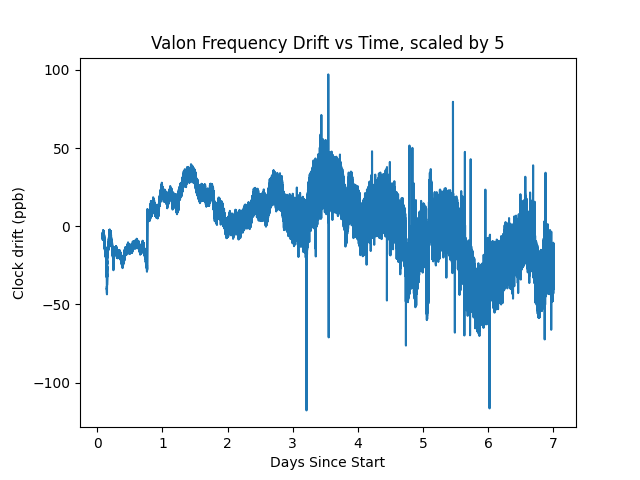

In [62]:
plt.close('all')
plt.figure()
plt.plot(dayIdx, ((valonDataTrimArr/valonMean) - 1) * 1e9 * 5)
plt.ylabel('Clock drift (ppb)')
plt.xlabel('Days Since Start')
plt.title('Valon Frequency Drift vs Time, scaled by 5')